# Аналитика стартапа

Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

# Этапы выполнения проекта:
- Подготовить данные;
- Изучить и проверить данные;
- Провести исследовательский анализ данных;
- Изучить воронку событий;
- Провести A/A/B эксперемент;
- Изучить результаты эксперемента;
- Сделать вывод;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats as st
import math as mth

# Предобработка данных

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = ['event_name', 'user_id', 'timestamp', 'group']

In [5]:
df.head()

,event_name,user_id,timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Проверим пропуски

In [6]:
df.isna().sum()

event_name    0
user_id       0
timestamp     0
group         0
dtype: int64

Проверим на дубликаты

In [7]:
df.duplicated().sum()

413

Удалим дубликаты

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Добавим столбец даты и времени, а также отдельный столбец дат

In [9]:
df['dt'] = pd.to_datetime(df['timestamp'], unit='s')

In [10]:
df['date'] = pd.to_datetime(df['dt'].dt.date)

In [11]:
df

,event_name,user_id,timestamp,group,dt,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


Проверим группы на пересечение

In [12]:
g246 = df.query('group == 246')['user_id'].unique()
g247 = df.query('group == 247')['user_id'].unique()
g248 = df.query('group == 248')['user_id'].unique()

# 246-247


In [13]:
intersection_1 = []
for i in g246:
  if i in g247:
    intersection_1.append(i)
print(len(intersection_1))

0


# 246-248

In [14]:
intersection_2 = []
for i in g246:
  if i in g248:
    intersection_2.append(i)
print(len(intersection_2))

0


# 247-248

In [15]:
intersection_3 = []
for i in g247:
  if i in g248:
    intersection_3.append(i)
print(len(intersection_3))

0


# Вывод: 
Изучили данные

Проверили на пропуски и удалили дубликаты

Привели столбец dt к корректному формату и добавили столбец date

# Изучение данных

- Сколько всего событий в логе?

In [16]:
event_count = df['event_name'].count()
event_count

243713

- Сколько всего пользователей в логе?

In [17]:
user_count = df['user_id'].nunique()
user_count

7551

- Сколько в среднем событий приходится на пользователя?

In [19]:
print('В среднем на одного пользователя приходится:', (event_count/user_count).round(0), 'события')

В среднем на одного пользователя приходится: 32.0 события


- Максимальная и минимальная дата.

In [20]:
print(df['dt'].min())

2019-07-25 04:43:36


In [21]:
print(df['dt'].max())

2019-08-07 21:15:17


# Вывод:
Всего в логе 243713 событий;

Всего в логе 7551 пользователь;

В среднем на одного пользователя приходится 32 события;

Данные предоставлены за 2 недели;

# Гистограмма

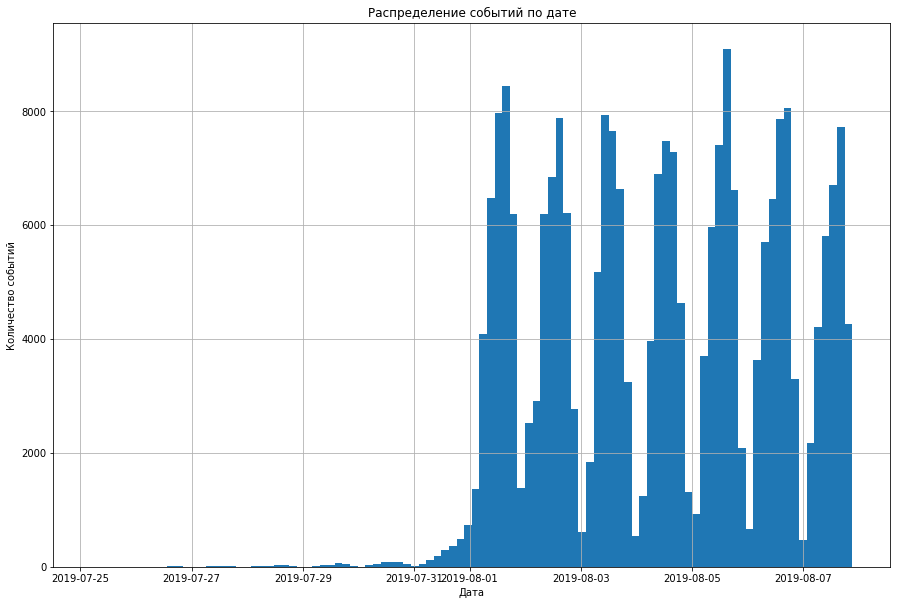

In [22]:
df['dt'].hist(bins=100,  figsize=(15, 10))
plt.title('Распределение событий по дате')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.show()

На гистограмме видно, что полные данные только с 01.08.2019

In [23]:
#отбросим период с неполными датами:
df_act = df.query('dt >= "2019-08-01"')

In [24]:
#посчитаем потерю событий:
len(df) - len(df_act)

2826

In [25]:
print(f"доля потерянных событий {(len(df) - len(df_act))/len(df):.1%}")

доля потерянных событий 1.2%


In [26]:
#посчитаем потерю пользователей:
df['user_id'].nunique()-df_act['user_id'].nunique()

17

In [27]:
print(f"доля потерянных пользователей {(df['user_id'].nunique()-df_act['user_id'].nunique())/df['user_id'].nunique():.1%}")

доля потерянных пользователей 0.2%


Проверим, есть ли пользователи из всех трёх экспериментальных групп.

In [28]:
df_act.pivot_table(index = 'group', values = 'user_id', aggfunc = 'count')

,user_id
group,
246,79302
247,77022
248,84563


# Вывод:

Событий в логе 243713

Количство уникальных пользователей: 7551

В среднем на пользователя приходится 20 событий

Данные предоставлены за 2 недели

Отбросили неполные данные и посчитали потери:

потеря событий всего 2826 из 243713 (1,2%)

потеря пользователей 17 из 7551 (0,2%)



# Воронка событий

- Какие события есть в логах, как часто они встречаются?


In [29]:
df_act.groupby('event_name').agg(count = ('user_id', 'count')).sort_values(by = 'count', ascending=False)

,count
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


- Сколько пользователей совершали каждое из этих событий?

In [30]:
user_per_event = df_act.groupby('event_name').agg(users=('user_id','nunique')).sort_values('users', ascending=False)
user_per_event['ratio'] = round(user_per_event['users']/df_act['user_id'].nunique() * 100, 2)
user_per_event

,users,ratio
event_name,,
MainScreenAppear,7419,98.47
OffersScreenAppear,4593,60.96
CartScreenAppear,3734,49.56
PaymentScreenSuccessful,3539,46.97
Tutorial,840,11.15


- Скорее всего 1,5% миновали главный экран, т.к переходили напрямую на страницу товаров.

# Порядок событий: 

Пользователи открывают главную страницу - выбирают товары - кладут в корзину - оплачивают

- Переход пользователей на следующий шаг воронки

In [31]:
#создадим сводную таблицу с количеством уникальных пользователей совершавших каждое из событий
user_to_event = df.query('event_name != "Tutorial"').pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by = 'user_id', ascending = False)
#добавим столбец со смещенными значениями количества пользователей методом shift
#недостающее значение заполним первым значением столбца параметром fill_value
user_to_event['shift'] = user_to_event['user_id'].shift(1, fill_value = user_to_event['user_id'].loc[user_to_event.index[0]])
#посчитаем и добавим столбец с конверсией округленной до 1 десятка
user_to_event['conversion'] = round(user_to_event['user_id']/user_to_event['shift']*100, 1)
#в итоговой таблице оставим только количество уникальных пользователей и конверсией
user_to_event = user_to_event[['user_id', 'conversion']]
user_to_event

,user_id,conversion
event_name,,
MainScreenAppear,7439,100.0
OffersScreenAppear,4613,62.0
CartScreenAppear,3749,81.3
PaymentScreenSuccessful,3547,94.6


# Вывод:
Потеря большинства пользователей происходит при переходе с первого шага на второй.

- Сколько пользователей доходит от первого шага до оплаты?

In [32]:
print(f"Доля пользователей прошедших от первого события до оплаты {user_to_event['user_id'].loc[user_to_event.index[-1]]/user_to_event['user_id'].loc[user_to_event.index[0]]:.1%}")


Доля пользователей прошедших от первого события до оплаты 47.7%


# Вывод:

Количетво событий в логе:

MainScreenAppear - 117328

OffersScreenAppear - 46333

CartScreenAppear - 42303

PaymentScreenSuccessful - 33918

Tutorial - 1005

Количество пользователей совершавших событие:

MainScreenAppear - 7419 пользователей (98.47%)

OffersScreenAppear - 4593 пользователей (60.96%)

СartScreenAppear - 3734 пользователей (49.56%)

PaymentScreenSuccessful - 3539 пользователей (46.97%)

Tutorial - 840 пользователей (11.15%)

Порядок событий: Пользователи открывают главную страницу - выбирают товары - кладут в корзину - оплачивают

Потеря большинства пользователей происходит при переходе с первого шага на второй.

Доля пользователей прошедших от первого события до оплаты 47.7%


# Изучение результатов экспемента 

- Сколько пользователей в каждой экспериментальной группе?

In [33]:
df_act.pivot_table(index = 'group', values = 'user_id', aggfunc = 'nunique')

,user_id
group,
246,2484
247,2513
248,2537


# Вывод:

Количество уникальных пользователей по группам:

в 246 группе 2484 уникальных пользователей

в 247 группе 2513 уникальных пользователей

в 248 группе 2537 уникальных пользователей.

- Находят ли статистические критерии разницу между выборками 246 и 247?

In [34]:
group_246 = df_act.query('group == 246')
group_247 = df_act.query('group == 247')
group_248 = df_act.query('group == 248')

Самые популярные события по группам:

# 246


In [35]:
group_246.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by = 'user_id', ascending = False)


,user_id
event_name,
MainScreenAppear,2450
OffersScreenAppear,1542
CartScreenAppear,1266
PaymentScreenSuccessful,1200
Tutorial,278


# 247

In [36]:
group_247.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by = 'user_id', ascending = False)


,user_id
event_name,
MainScreenAppear,2476
OffersScreenAppear,1520
CartScreenAppear,1238
PaymentScreenSuccessful,1158
Tutorial,283


# Проверка гипотез с помощью z-теста

Гипотеза:

H0:Между долями статистической значимой разницы нет, поведение групп не отличается;

H1:Между долями статистическая значимая разница есть, поведение групп отличается.

In [37]:
#критический уровень статистической значимости
alpha = 0.05
    
#количсетво уникальных пользователей совершивших событие в каждой группе 
un_users_event = np.array([group_246[group_246['event_name'] == 'MainScreenAppear']['user_id'].nunique(), group_247[group_247['event_name'] == 'MainScreenAppear']['user_id'].nunique()])
        
#количество уникальных пользователей в группах
un_users_group = np.array([group_246['user_id'].nunique(), group_247['user_id'].nunique()])
    
# пропорция успехов в первой группе:
p1 = un_users_event[0]/un_users_group[0]
# пропорция успехов во второй группе:
p2 = un_users_event[1]/un_users_group[1]
    
# пропорция успехов в комбинированном датасете:
p_combined = (un_users_event[0] + un_users_event[1]) / (un_users_group[0] + un_users_group[1])
    
# разница пропорций в датасетах
difference = p1 - p2
    
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/un_users_group[0] + 1/un_users_group[1]))  
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  
    
#Так как распределение статистики нормальное, вызовем метод cdf()
#Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака.
#Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:
p_value = (1 - distr.cdf(abs(z_value))) * 2
          
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Оборачиваем в функцию

In [38]:
def test(g1, g2, event_name):
    
    #критический уровень статистической значимости
    alpha = 0.05
    
    #количсетво уникальных пользователей совершивших событие в каждой группе 
    un_users_event = np.array([g1[g1['event_name'] == event_name]['user_id'].nunique(), g2[g2['event_name'] == event_name]['user_id'].nunique()])
        
    #количество уникальных пользователей в группах
    un_users_group = np.array([g1['user_id'].nunique(), g2['user_id'].nunique()])
    
    # пропорция успехов в первой группе:
    p1 = un_users_event[0]/un_users_group[0]
    # пропорция успехов во второй группе:
    p2 = un_users_event[1]/un_users_group[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (un_users_event[0] + un_users_event[1]) / (un_users_group[0] + un_users_group[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/un_users_group[0] + 1/un_users_group[1])) 
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    
    #Так как распределение статистики нормальное, вызовем метод cdf()
    #Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака.
    #Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(event_name)
          
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()

In [39]:
#создадим список с уникальными событиями:
event_name_array = df['event_name'].unique()
#создадим цикл, который будет подставлять в функцию уникальные значения собитый:
for event_name in event_name_array:
    test(group_246, group_247, event_name)

MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



# Вывод: 
Статистические критерии разницу между выборками 246 и 247 не находят, т.к. разница не значительная.

Обе эти группы можно считать контрольными. 

Разбиение на группы работает корректно


- Группа с измененным шрифтом


In [40]:
#Аналогично проверим 1 контрольную группу 246 с группой с изменным шрифтом 248
for event_name in event_name_array:
    test(group_246, group_248, event_name)

MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



# Вывод: 
Значимой разницы в поведении группы 246 и 248 нет.

In [41]:
#Проверим 2 контрольную группу 247 с группой с изменным шрифтом 248
for event_name in event_name_array:
    test(group_246, group_248, event_name)

MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



# Вывод: 
Значимой разницы в поведении группы 247 и 248 нет.

- Объединим группы 246 и 247 и проверим с группой 248

In [42]:
group_246_247 = pd.concat([group_246, group_247])
for event_name in event_name_array:
    test(group_246_247, group_248, event_name)

MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



# Вывод: 
Значимой разницы по ведении объединенной группы и группы с измененном шрифтом нет.

Изменение шрифта не повлияло на поведение пользователей.

# Уровень значимости/количество проверок

Уровень значимости 0.05

Проведено 20 проверок.


# При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? 

Если бы взяли больший уровень значимости, например 0.1, вероятность увидеть ложноположительный результат была бы выше в 2 раза.

# Вывод:

Количество уникальных пользователей по группам:

в 246 группе 2484 уникальных пользователей.

в 247 группе 2513 уникальных пользователей.

в 248 группе 2537 уникальных пользователей.

Статистические критерии разницу между выборками 246 и 247 не находят, т.к. разница не значительная. О

Обе эти группы можно считать контрольными.

Разбиение на группы работает корректно.

Значимой разницы по ведении объединенной группы и группы с измененном шрифтом нет.

Изменение шрифта не повлияло на поведение пользователей.

Уровень значимости выбрали 0.05

Проведено 20 проверок.

Если бы взяли больший уровень значимости, например 0.1, вероятность увидеть ложноположительный результат была бы выше в 2 раза.

# Итоговый вывод

Изучили данные

Проверили на пропуски и удалили дубликаты

Привели столбец dt к корректному формату и добавили столбец date

Событий в логе 243713

Количство уникальных пользователей: 7551

В среднем на пользователя приходится 32 события

Данные предоставлены за 2 недели

Отбросили неполные данные и посчитали потери:

потеря событий всего 2826 из 243713 (1,2%)

потеря пользователей 17 из 7551 (0,2%)

Количетво событий в логе:

MainScreenAppear - 117328

OffersScreenAppear - 46333

CartScreenAppear - 42303

PaymentScreenSuccessful - 33918

Tutorial - 1005

Количество пользователей совершавших событие:

MainScreenAppear - 7419 пользователей (98.47%)

OffersScreenAppear - 4593 пользователей (60.96%)

СartScreenAppear - 3734 пользователей (49.56%)

PaymentScreenSuccessful - 3539 пользователей (46.97%)

Tutorial - 840 пользователей (11.15%)

Порядок событий: Пользователи открывают главную страницу - выбирают товары - кладут в корзину - оплачивают

Потеря большинства пользователей происходит при переходе с первого шага на второй.

Доля пользователей прошедших от первого события до оплаты 47.7%

сравнение групп 246 и 247:
    - Статистические критерии разницу между выборками 246 и 247 не находят, т.к. ни для оного из событий разница не оказалось значимой обе эти группы можно считать контрольными. Разбиение на группы работает корректно.
    
сравнение групп 246 и 248:
    - Значимой разницы в поведении пользователей групп 246 и 248 нет.
    
сравнение групп 247 и 248:
    - Значимой разницы в поведении пользователей групп 247 и 248 нет.
    
сравнение групп 246+247 и 248:
    - Значимой разницы в поведении пользователей объедененной контрольной группы и эксперементальной группы нет.

Критический уровень статистической значимости мы брали 0.05, это озачает что мы рискуем получить ошибку первого рода в одном из 20 случаев. Мы провели 20 экспериментов. Если бы взяли больший уровень значимости, например 0.1, вероятность увидеть ложноположительный результат была бы выше в 2 раза.

Множесто А/В-тестов, проведённых по каждому из событий, не обнаружили статистически значимой разницы между группами. 

Т.е. изменение шрифтов в приложении на поведение пользователей не повлияло.
